## <center>TP1 of Practical Introduction to Machine Learning:</center>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### LOADING THE DATA AND DATA VIZUALISATION

#### TEMPERATURE DATASET

In [5]:
data_temper = np.load("temper.npz")

In [16]:
print(len(data_temper))

3


In [636]:
data = data_temper["data"]
villes = data_temper["villes"]
varname = data_temper["varname"]

In [637]:
# 15 cities, each described by 14 features (the last 2 being the longitude and the latitude)
print(data.shape)
print(data[:5,:5])
print(data[:5,:2])

(15, 14)
[[ 5.6  6.6 10.3 12.8 15.8]
 [ 6.1  5.8  7.8  9.2 11.6]
 [ 2.6  3.7  7.5 10.3 13.8]
 [ 1.5  3.2  7.7 10.6 14.5]
 [ 2.4  2.9  6.   8.9 12.4]]
[[5.6 6.6]
 [6.1 5.8]
 [2.6 3.7]
 [1.5 3.2]
 [2.4 2.9]]


In [638]:
# Just keep the temperatures during the the year
X_temper = data[:,:-2]
print(X_temper.shape)

(15, 12)


In [639]:
latitudes = data[:,-2]
longitudes = data[:,-1]

In [34]:
print(villes)

['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']


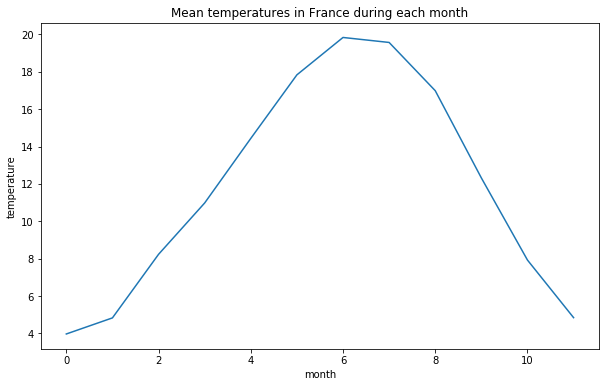

In [1170]:
fig = plt.figure(figsize=(10,6))

plt.plot(np.mean(X_temper, axis=0))
plt.xlabel("month")
plt.ylabel("temperature")
plt.title("Mean temperatures in France during each month")
plt.show()

Without surprise, the average temperature is low during the winter (the first 3 months), but yet it progressively increases until it reaches a peak in summer (month 7, ie in July). Then it decreases until it returns to its initial level (January's level) at the end of the year (December). 

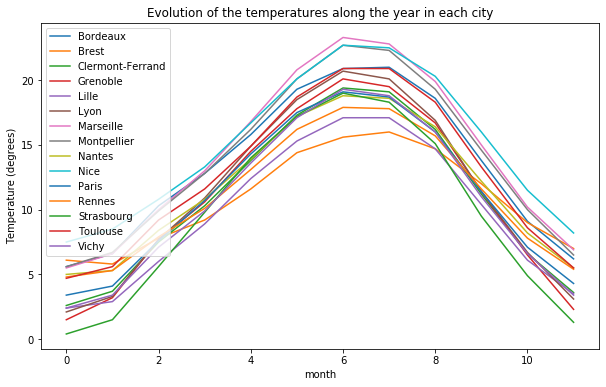

In [928]:
fig = plt.figure(figsize=(10,6))
for i,ville in enumerate(villes):
    plt.plot(range(12),X_temper[i,:], label="{}".format(ville))
plt.xlabel("month")
plt.ylabel("Temperature (degrees)")
plt.title("Evolution of the temperatures along the year in each city")
plt.legend(loc='upper left')
plt.show()

The average temperatures in each city follow the same behavior as the previous plot's (France's mean temperatures along the year): they are increasing from the beginning of the year to the summer (month 7), then decrease until the end of the year.

Marseille (pink) is the hottest city during the summer, followed by Nice (cyan), whereas the coldest ones are Brest (orange) and Lille (purple).

When looking at the map of France, it appears that Nice and Marseille are geographically very close to one another, and that Brest and Lille both are located more in the north of the country: there seem to have a relationship between the location and the temperatures along the year.

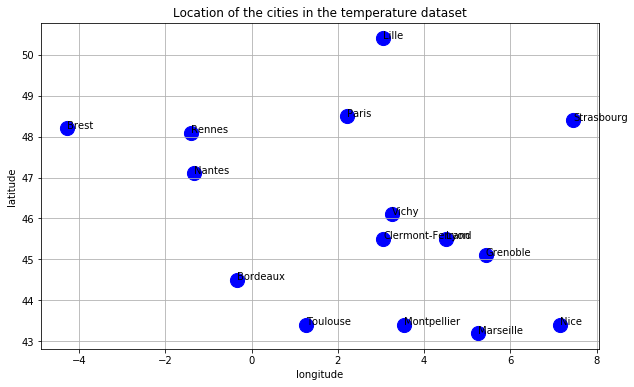

In [703]:
def plot_cities(title, colors=None):
    
    fig, ax = plt.subplots(figsize=(10,6))
    if colors is None:
        plt.scatter(longitudes, latitudes, color="blue", cmap="tab10", vmax=9, s=200)
    else:
        plt.scatter(longitudes, latitudes, c=colors, cmap="tab10", vmax=9, s=200)
    
    for i, city in enumerate(villes):
        ax.annotate(city,(longitudes[i], latitudes[i]))

    ax.grid(True)
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")
    ax.set_title(title)
    plt.show()

plot_cities("Location of the cities in the temperature dataset")

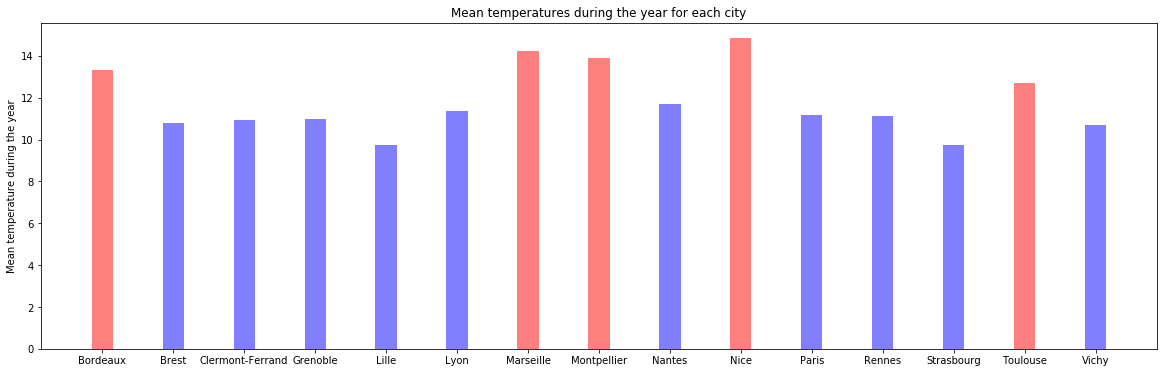

In [946]:
means_per_city = {}

for i,ville in enumerate(villes):
    means_per_city[ville] = X_temper[i,:].mean()

colors = ["blue", "red"]

colors_per_city = [colors[int(m > 12)] for m in means_per_city.values()]
    
fig = plt.figure(figsize=(20,6))
plt.bar(means_per_city.keys(), means_per_city.values(), width=0.3, color=colors_per_city, alpha=0.5)

plt.ylabel("Mean temperature during the year")
plt.title("Mean temperatures during the year for each city")
plt.show()

The red bars correspond to the average temperatures higher than 12 (degrees). It turns out that these red bars are also associated to the southern cities (Nice, Marseille, Bordeaux etc).

#### MNIST DATASET

In [343]:
data_mnist = np.load("digits.npz")

x_mnist = data_mnist["x"]
y_mnist = data_mnist["y"]

print(x_mnist.shape)

(3000, 784)


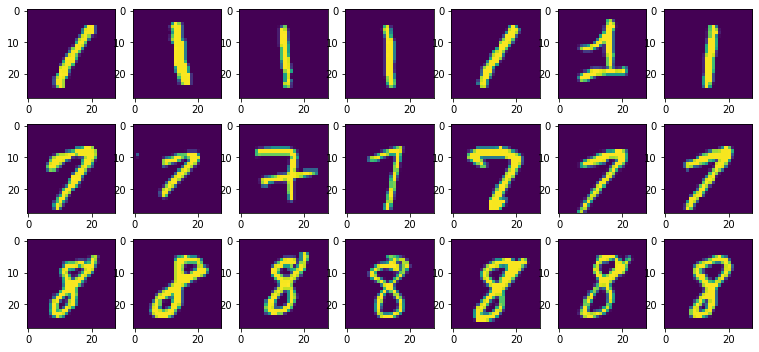

In [806]:
nrows, ncols = 3, 7
fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(13, 6)) 

digits = np.unique(y_mnist)

for i, digit in enumerate(digits):
    for j in range(ncols):
        ax[i,j].imshow(x_mnist[1000*i+j,:].reshape(28,28))

plt.show()

We can observe that many "7" images look like a "1" since they don't have the horizontal bar.

Therefore, we might already predict that the clustering will have much trouble classifying the digits "7".

A perfect classification of the images will result in a piecewise constant plot with 3 levels (one for each class) similar to the below figure:

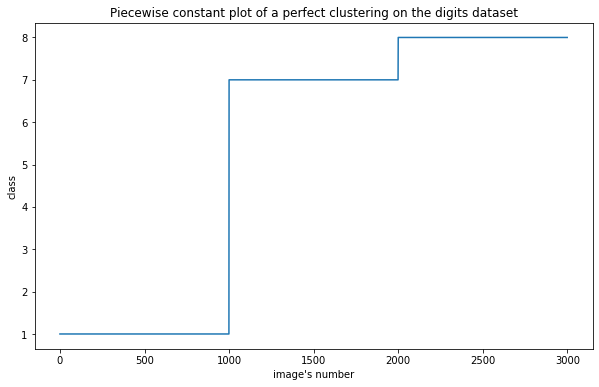

In [1077]:
fig = plt.figure(figsize=(10,6))
plt.plot(y_mnist)
plt.xlabel("image's number")
plt.ylabel("class")
plt.title("Piecewise constant plot of a perfect clustering on the digits dataset")
plt.show()

### CLUSTERING

#### TEMPERATURE

### KMeans with n_components = 2

In [96]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)
model.fit(X_temper)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [110]:
centroids_temper = model.cluster_centers_
print(centroids_temper.shape)

(2, 12)


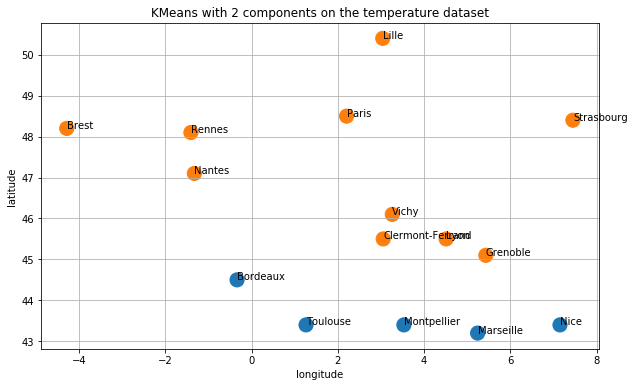

In [848]:
y_preds_temper = model.predict(X_temper)
plot_cities("KMeans with 2 components on the temperature dataset", y_preds_temper)

The clustering on the temperatures results in a geographical clustering, as we pointed out the strong relationship between both information (locations and temperatures) in the data vizualisation section. 

The KMeans with K=2 managed to highlight the southern cities (in blue), so that there are 2 clusters: the southern cities and the other cities, composed of northern cities and cities in the center of France.

The southern cities are hotter during (almost) the entire year, as shown below:

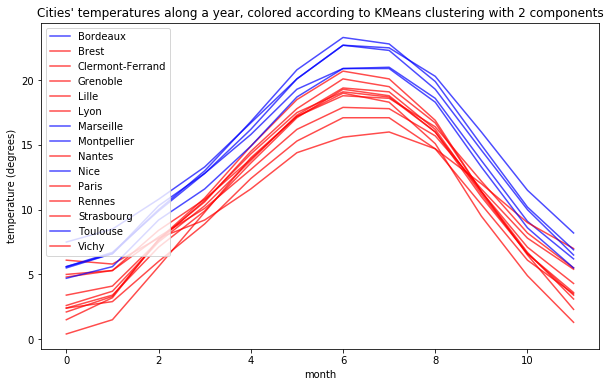

In [662]:
fig = plt.figure(figsize=(10,6))

for i,ville in enumerate(villes):
    if y_preds_temper[i] == 0:
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), color="blue", alpha=0.7)
    else:
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), color="red", alpha=0.7)

    
plt.xlabel("month")
plt.ylabel("temperature (degrees)")
plt.title("Cities' temperatures along a year, colored according to KMeans clustering with 2 components")
plt.legend(loc='upper left')
plt.show()

Here are the centroids of the 2 clusters, the blue one being the centroid of the southern cities, the orange the one to the rest of the cities.

The centroids can be interpreted as fictive cities having representative temperatures of the cities included in their clusters:

#### Centroids

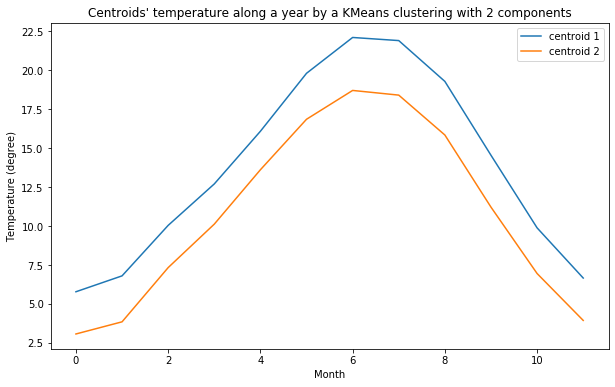

In [762]:
fig = plt.figure(figsize=(10,6))

for i in range(len(centroids_temper)):
    plt.plot(centroids_temper[i], label="centroid {}".format(i+1))
plt.xlabel("Month")
plt.ylabel("Temperature (degree)")
plt.title("Centroids' temperature along a year by a KMeans clustering with 2 components")
plt.legend()
plt.show()

#### Searching for the "best" K

#### Elbow method

In [1121]:
K_range = range(2,7)

inertias = []

for k in K_range:
    model_k = KMeans(n_clusters=k, random_state=0)
    model_k.fit(X_temper)
    inertia = model_k.inertia_
    inertias.append(inertia)

print(inertias)

[198.287, 118.74895238095237, 88.19466666666666, 61.12, 42.74666666666667]


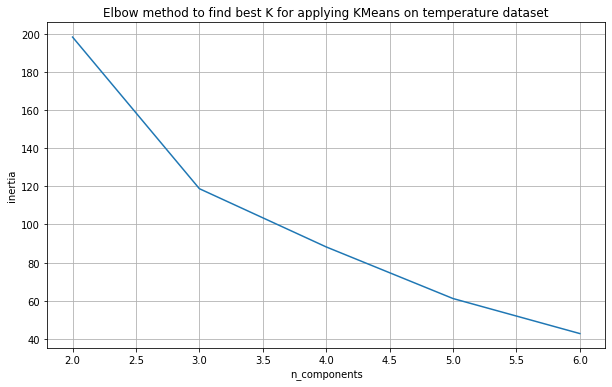

In [1122]:
fig = plt.figure(figsize=(10,6))
plt.plot(K_range, inertias)
plt.xlabel("n_components")
plt.ylabel("inertia")
plt.title("Elbow method to find best K for applying KMeans on temperature dataset")
plt.grid(True)
plt.show()

The elbow method suggests to use n_components=3.


### KMeans with n_components = 3

In [254]:
model3 = KMeans(n_clusters=3, random_state=0)
model3.fit(X_temper)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [273]:
y_preds_temper3 = model3.predict(X_temper)
centroids_temper3 = model3.cluster_centers_

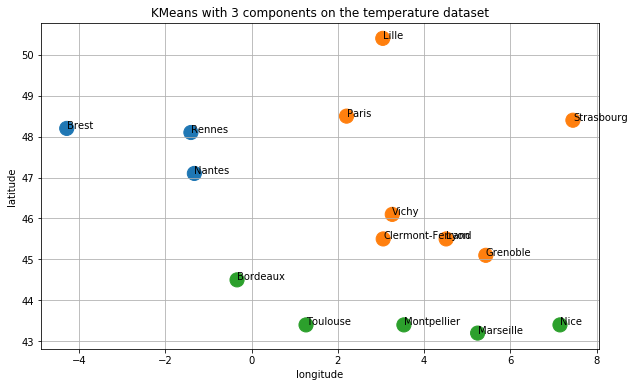

In [705]:
plot_cities("KMeans with 3 components on the temperature dataset", y_preds_temper3)

The third cluster is composed of cities located in the west, near the Atlantic ocean.

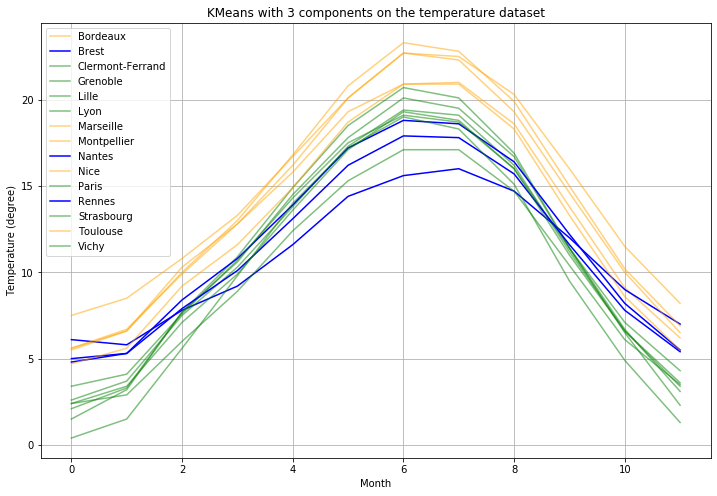

In [1080]:
fig = plt.figure(figsize=(12,8))

for i,ville in enumerate(villes):
    if y_preds_temper3[i] == 0:
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), color="blue")
    elif y_preds_temper3[i] == 1:
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), color="green", alpha=0.5)
    else:
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), color="orange", alpha=0.5)

plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Temperature (degree)")
plt.title("KMeans with 3 components on the temperature dataset")
plt.legend(loc='upper left')
plt.show()

The specificity of these west cities (blue curves) is that their variation of temperatures along the year are less important: in other words, it corresponds to the oceanographic climate resulting from Atlanctic's proximity.

To plot the figure below, I have computed the standard deviation of the temperatures (along the year) for each city. Then, I grouped the standard deviations per cluster, given the class (west,north/center,south) of their corresponding cities.

It is striking that the western cities' standard deviations are way lower:

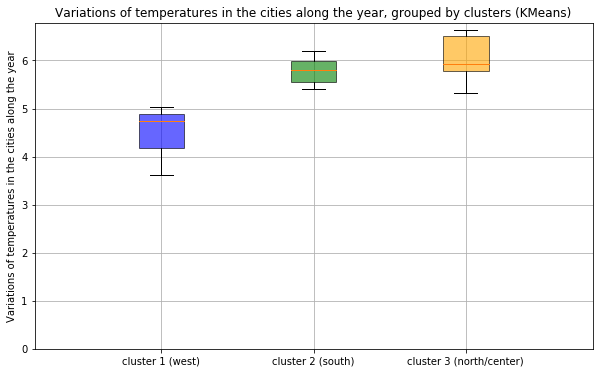

In [1107]:
import warnings
warnings.filterwarnings("ignore")

std_temper3 = [[],[],[]]

for i, ville in enumerate(villes):
    if y_preds_temper3[i] == 0:
        std_temper3[0].append(X_temper[i,:].std())
    elif y_preds_mnist3[i] == 1:
        std_temper3[1].append(X_temper[i,:].std())
    else:
        std_temper3[2].append(X_temper[i,:].std())

fig, ax = plt.subplots(figsize=(10, 6))        

bplot = ax.boxplot(std_temper3,
                   positions=[1, 1.6, 2.2],
                   labels=["cluster 1 (west)", "cluster 2 (south)", "cluster 3 (north/center)"],
                   patch_artist=True,
                   boxprops=dict(alpha=0.6))

colors = ["blue", "green", "orange"]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.grid(True)
ax.set_ylabel("Variations of temperatures in the cities along the year")
ax.set_ylim(ymin=0)
ax.set_title("Variations of temperatures in the cities along the year, grouped by clusters (KMeans)")
plt.show()

#### Centroids

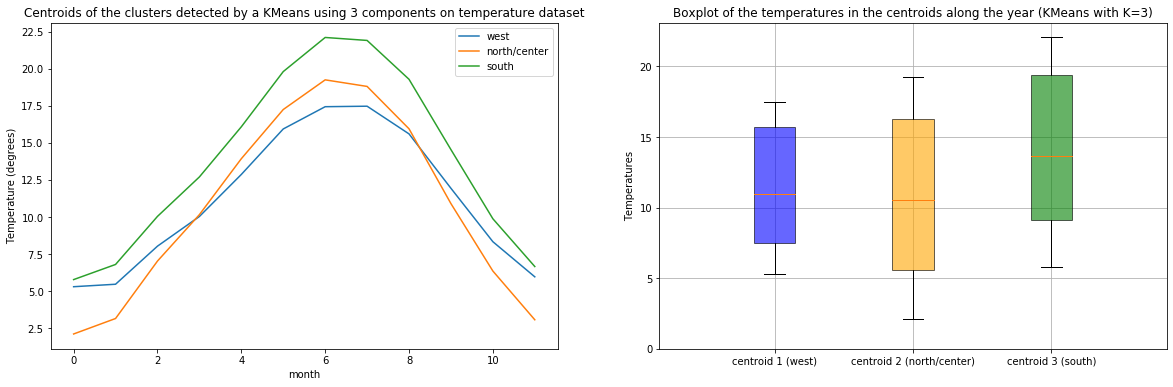

In [1108]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6)) 

clusters = ["west", "north/center","south"]

for i,cluster in enumerate(clusters):
    ax[0].plot(centroids_temper3[i], label=cluster)
    
ax[0].set_xlabel("month")
ax[0].set_ylabel("Temperature (degrees)")
ax[0].set_title("Centroids of the clusters detected by a KMeans using 3 components on temperature dataset")
ax[0].legend()

# --------------------------------------------------------------------------------------------------------------

bplot = ax[1].boxplot([centroids_temper3[i] for i in range(3)],
                   positions=[1, 1.6, 2.2],
                   labels=["centroid 1 (west)", "centroid 2 (north/center)", "centroid 3 (south)"],
                   patch_artist=True,
                   boxprops=dict(alpha=0.6))

colors = ["blue", "orange", "green"]

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax[1].grid(True)
ax[1].set_ylabel("Temperatures")
ax[1].set_ylim(ymin=0)
ax[1].set_title("Boxplot of the temperatures in the centroids along the year (KMeans with K=3)")

plt.show()

The centroids are easily distinguisable: 

- the green curve correspond to the southern centroid since it has the highest temperatures during the whole year


- the blue curve is the western centroid since its temperatures vary less along the year


- the orange curve is the north/center centroid since it is an "in-between" (colder temperatures except from April to July, when the temperatures are between those of the 2 other centroids).

#### MNIST DATASET

#### KMeans with n_clusters = 3

In [305]:
model_mnist = KMeans(n_clusters=3, random_state=0)
model_mnist.fit(x_mnist)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [306]:
centroids_mnist = model_mnist.cluster_centers_

print(centroids_mnist.shape)

(3, 784)


#### Centroids 

Let's vizualise the centroids:

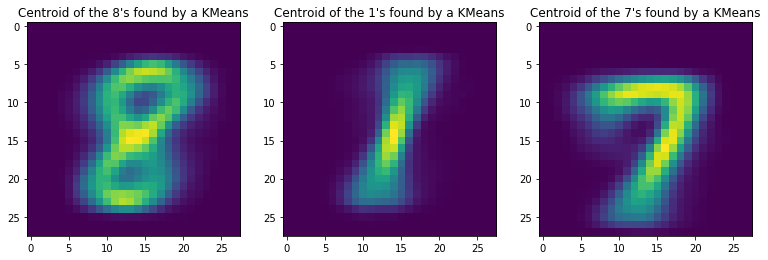

In [690]:
# Plots of the centroids of the KMeans with 3 components:

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(13, 6)) 

for i, digit in enumerate([8,1,7]):
    ax[i].imshow(centroids_mnist[i].reshape(28,28))
    ax[i].set_title("""Centroid of the {}'s found by a KMeans""".format(digit))

plt.show()

We can say that these images are not images from the dataset: indeed, they are blured.

In fact, the centroids correspond to virtual images that are the superposition of the images from their respective clusters.

#### Performance

In [316]:
y_preds_mnist = model_mnist.predict(x_mnist)

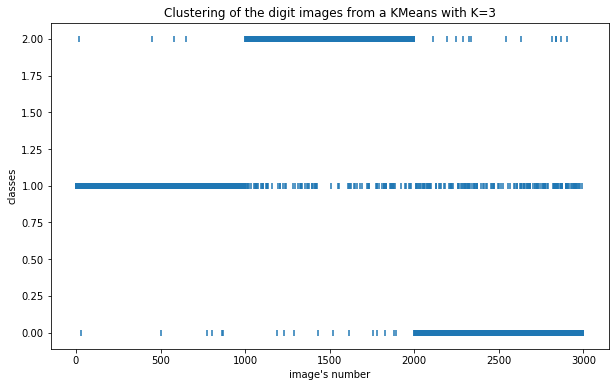

In [993]:
fig = plt.figure(figsize=(10,6))

plt.scatter(range(3000), y_preds_mnist, marker="|")
plt.xlabel("image's number")
plt.ylabel("classes")
plt.title("Clustering of the digit images from a KMeans with K=3")
plt.show()

According to the plot:

- the 1's are correctly predicted on [0,1000] since there is only one level of line.


- On [1000,2000], there are 2 levels of lines: 1 and 2, which means that the model confuse many 7's (level 2) with 1's (level 1). This is understandable because a "7" shape is pretty close to the shape of a "1".


- Finally, on [2000,3000], there are also 2 levels of lines: 1 and 0. It means that the model confuse many 8's (level 0) with 1's. This is more surprising, but it might results from the fact the controid of the 1's looks a bit like a 8.

$\underline{Remark}$: The model oftens confuse a 7 for a 1, but rarely the opposite mistake. 

In [153]:
from sklearn.metrics import adjusted_rand_score

adj_rand_score = adjusted_rand_score(y_preds_mnist, y_mnist.reshape(3000))

print(adj_rand_score)

0.7405571626609084


#### Searching for the best K

#### Elbow method

In [492]:
inertias = []

for k in K_range:
    m = KMeans(n_clusters=k)
    m.fit(x_mnist)
    inertia = m.inertia_
    inertias.append(inertia)

print(inertias)

[7544548113.210616, 6800396620.523192, 6357747372.202542, 6071222022.960933, 5794985251.21455]


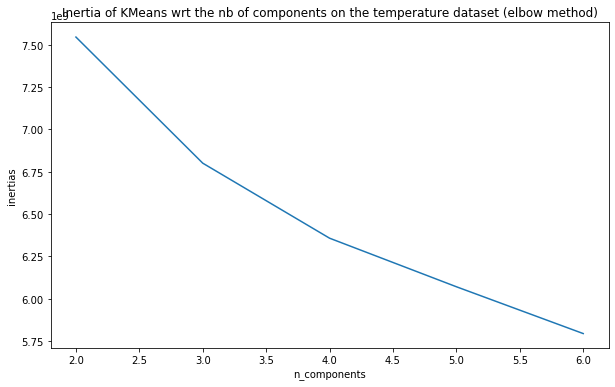

In [842]:
fig = plt.figure(figsize=(10,6))
plt.plot(K_range, inertias)
plt.xlabel("n_components")
plt.ylabel("inertias")
plt.title("Inertia of KMeans wrt the nb of components on the temperature dataset (elbow method)")
plt.show()

It looks like the best value to use is K=3, but it might also be K=4 since there there is a change of slope at that value. 

Below is just to check (we are not supposed to know the true classes, that is to say y_mnist) which value is the best according to the adjusted_rand_score metric:

In [994]:
rand_scores = []

for k in K_range:
    m = KMeans(n_clusters=k, random_state=0)
    m.fit(x_mnist)
    y_preds = m.predict(x_mnist)
    rand_scores.append(adjusted_rand_score(y_preds, y_mnist.reshape(3000)))

print(rand_scores)

[0.42089621765086194, 0.7362816244281163, 0.6766920146898115, 0.5705703027851972, 0.48688696693642824]


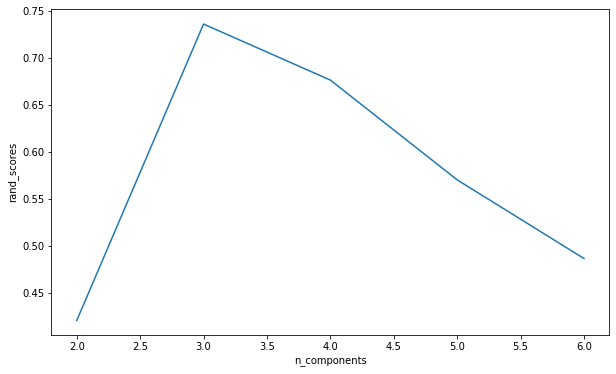

In [995]:
fig = plt.figure(figsize=(10,6))
plt.plot(K_range, rand_scores)
plt.xlabel("n_components")
plt.ylabel("rand_scores")
plt.show()

Because the higher the better for adjusted_rand_score, K=3 is then the best value for clustering the digits dataset.

### Density estimation

#### TEMPERATURE DATASET

#### GMM with n_components = 2 and covariance_type="diag"

In [185]:
from sklearn.mixture import GaussianMixture

gmm_temper = GaussianMixture(n_components=2, covariance_type="diag", random_state=0).fit(X_temper)

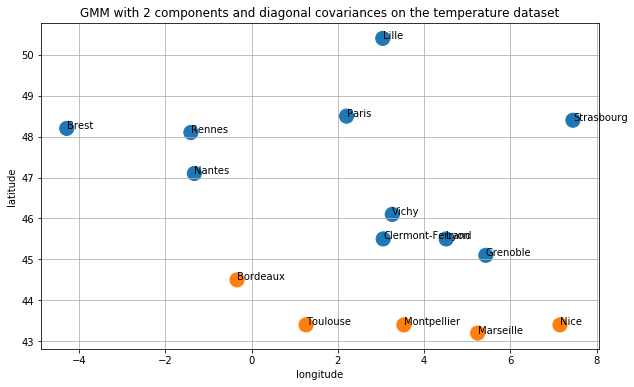

In [843]:
y_preds_temper_gmm = gmm_temper.predict(X_temper)
plot_cities("GMM with 2 components and diagonal covariances on the temperature dataset", y_preds_temper_gmm)

The clustering managed to split the southern cities from the other cities, exactly like the KMeans with K=2.
This was expected since the KMeans is a special case of the GMM when the covariance matrices are diagonal.

#### Searching for the "best" combinaison of n_components and covariance_type:

A priori, we know that the "good" value for n_components is 3, because there are 3 regions south/north/west in the dataset, but let's try to recover this result using a defined criterion.
Therefore, as we did with the KMeans algorithm (through the elbow method), let's now search for the "best" hyperparameters n_components and covariance_type to use when applying a GMM.
There are many criteria we could look at to take this decision, for instance the AIC and BIC, or log-likelihood. We are going to use these 3:

In [1001]:
# Store the best configuration according to AIC
best_configuration_aic = {"K": 0, "covariance_type": ""}

# Store the best configuration according to BIC
best_configuration_bic = {"K": 0, "covariance_type": ""}

best_aic, best_bic = float("inf"), float("inf")

covariance_types = ["full", "tied", "diag", "spherical"]

for k in K_range:
    for covariance_type in covariance_types:
        tmp_gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=0).fit(X_temper)
        aic = tmp_gmm.aic(X_temper)
        bic = tmp_gmm.bic(X_temper)
        if aic < best_aic:
            best_configuration_aic["K"], best_configuration_aic["covariance_type"] = k, covariance_type
            best_aic = aic
            
        if bic < best_bic:
            best_configuration_bic["K"], best_configuration_bic["covariance_type"] = k, covariance_type
            best_bic = bic

print("Best combinaison of hyperparameters according to AIC: ",best_configuration_aic)
print("Best combinaison of hyperparameters according to BIC: ",best_configuration_bic)

Best combinaison of hyperparameters according to AIC:  {'K': 5, 'covariance_type': 'full'}
Best combinaison of hyperparameters according to BIC:  {'K': 2, 'covariance_type': 'full'}


AIC and BIC criterion didn't lead to the same combinaisons. Both encourage to use covariance_type="full", which may be reasonable since the dataset is not really high-dimensional ("only" 12 features).
Since the temperatures along the seasons are not independant, the covariance_type="full" might indeed be a good choice.

However, we should consider 5 components in the mixture according to AIC, 2 according to BIC. Which value of K should we take ?

According to the log-likelihood, we should use K=2 and covariance_type="full", as deduced by BIC:

In [1141]:
best_combi = {"K": 0, "type": ""}

highest_ll = -10**5

covariance_types = ["full", "tied", "diag", "spherical"]

for k in K_range:
    for covariance_type in covariance_types:
        tmp_gmm = GaussianMixture(n_components=3, covariance_type=covariance_type, random_state=0).fit(X_temper)
        tmp_gmm.fit(X_temper)
        ll = tmp_gmm.score_samples(X_temper)
        if np.sum(ll) > highest_ll:
            best_combi["K"], best_combi["type"] = k, covariance_type
            best_type = covariance_type
            highest_ll = np.sum(ll)

print("Best combinaison for GMM according to log likelihood: ",best_combi)

Best combinaison for GMM according to log likelihood:  {'K': 2, 'type': 'full'}


Then let's implement it:

#### GMM with n_components=2 and covariance_type="full"

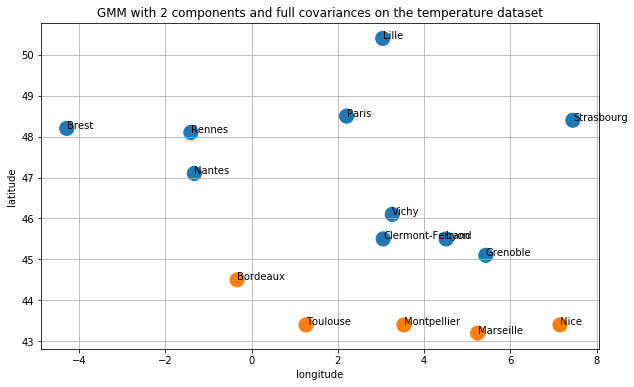

In [1142]:
gmm_temper2 = GaussianMixture(n_components=2, covariance_type="diag", random_state=0).fit(X_temper)

y_preds_temper_gmm2 = gmm_temper2.predict(X_temper)
plot_cities("GMM with 2 components and full covariances on the temperature dataset", y_preds_temper_gmm2)

The clustering might be the same as previously when using covariance_type="diag", but the log-likelihood of the samples is higher, meaning that the gaussian components are more relevant.  


Text(0.5, 1.0, ' Means of the components according to a GMM(K=2, cov_type="full") on temperature dataset ')

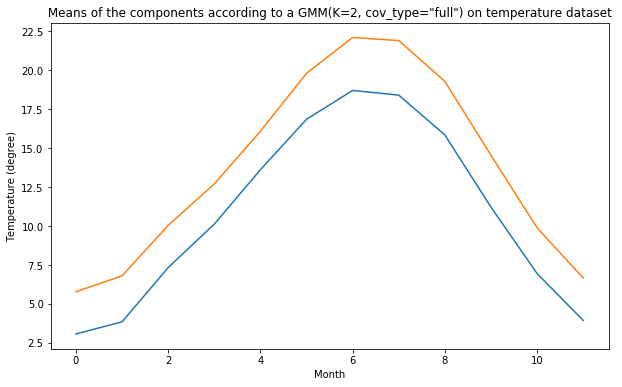

In [1162]:
fig = plt.figure(figsize=(10,6))

for i in range(2):
    plt.plot(gmm_temper2.means_[i])
plt.xlabel("Month")
plt.ylabel("Temperature (degree)")
plt.title(""" Means of the components according to a GMM(K=2, cov_type="full") on temperature dataset """)

The means of the clusters are also identical to the ones of the KMeans: the orange signal is the southern cities'mean, the blue one is the mean of the rest of the cities.

#### Log probability of the samples for the estimated density

Let's sort out the log likelihoods of the cities so that the cities at the very top are the most likely to be outliers (lower log-likelihood):

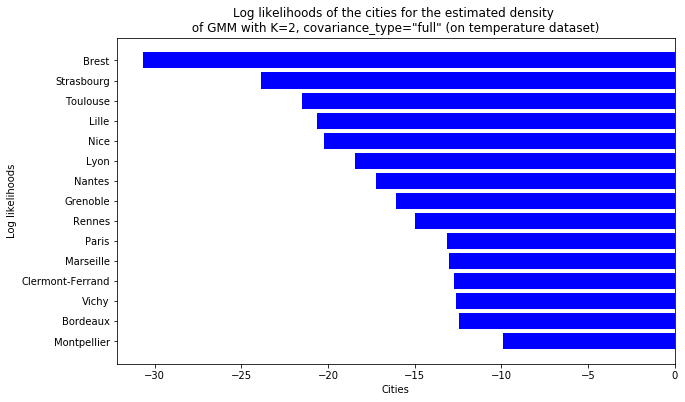

In [1147]:
log_likelihoods_temper2 = gmm_temper2.score_samples(X_temper)
sorted_indices2 = np.flip(log_likelihoods_temper2.argsort())

fig = plt.figure(figsize=(10,6))

plt.barh(villes[sorted_indices2], log_likelihoods_temper2[sorted_indices2], color="blue")
plt.xlabel("Cities")
plt.ylabel("Log likelihoods")
plt.title("""Log likelihoods of the cities for the estimated density \n of GMM with K=2, covariance_type="full" (on temperature dataset) """)
plt.show()

Brest is the most likely to be an outlier. If we look at Brest's temperatures signal, it is indeed pretty singular, because it has by far the lowest variations of temperatures along the year:

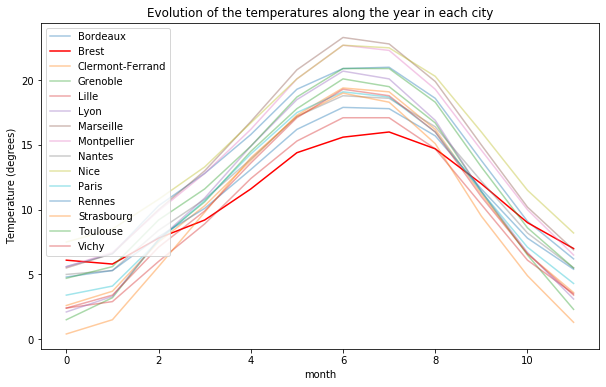

In [1167]:
fig = plt.figure(figsize=(10,6))
for i,ville in enumerate(villes):
    if ville=="Brest":
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), color="red")
    else:
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), alpha=0.4)
plt.xlabel("month")
plt.ylabel("Temperature (degrees)")
plt.title("Evolution of the temperatures along the year in each city")
plt.legend(loc='upper left')
plt.show()

As with the KMeans, let's also try n_components=3. Because we already said that setting covariance_type="diag" is equivalent to using the KMeans, we use the "full" type as proposed by the BIC and log-likelihood optimization methods:

#### GMM with n_components = 3 and covariance_type="full"

In [1148]:
gmm_temper3 = GaussianMixture(n_components=3, covariance_type="full", random_state=0).fit(X_temper)

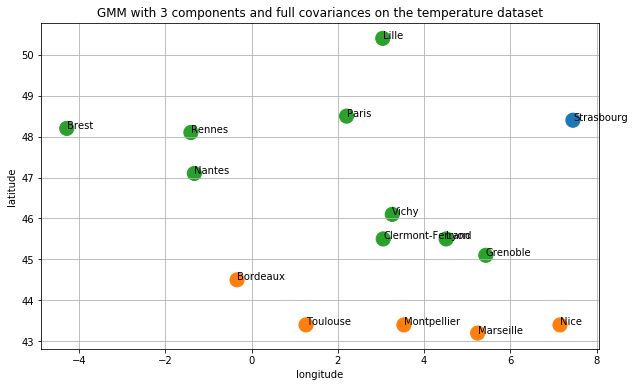

In [1149]:
y_preds_temper_gmm3 = gmm_temper3.predict(X_temper)
plot_cities("GMM with 3 components and full covariances on the temperature dataset", y_preds_temper_gmm3)

This clustering is not satisfying at all because Strasbourg is alone$^*$. GMM didn't manage to find out the western cluster, but has only captured the differences in south/north cities climates. 

This is surprising because even if Strasbourg is geograpically quite isolated, we clustered on the temperatures, not the location, and Strasbourg's temperatures signal is not noticeably different (cf the figure below):

$^*$: On other student's Jupyter notebook, the cluster was not the same, even though the parameters were all the same, random_state=0, and the temperatures dataset has not been pre-processed.

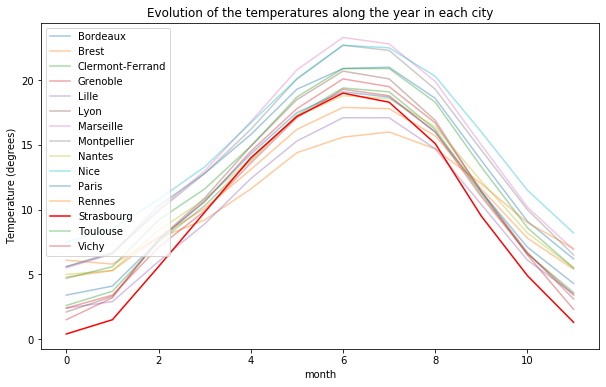

In [1165]:
fig = plt.figure(figsize=(10,6))
for i,ville in enumerate(villes):
    if ville=="Strasbourg":
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), color="red")
    else:
        plt.plot(range(12),X_temper[i,:], label="{}".format(ville), alpha=0.4)
plt.xlabel("month")
plt.ylabel("Temperature (degrees)")
plt.title("Evolution of the temperatures along the year in each city")
plt.legend(loc='upper left')
plt.show()

#### Means of the components

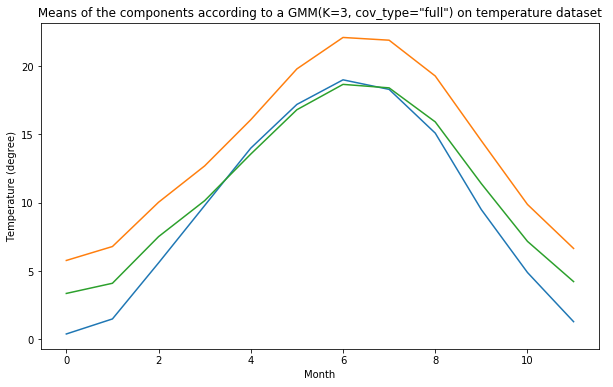

In [1151]:
fig = plt.figure(figsize=(10,6))

for i in range(3):
    plt.plot(gmm_temper3.means_[i])
plt.xlabel("Month")
plt.ylabel("Temperature (degree)")
plt.title(""" Means of the components according to a GMM(K=3, cov_type="full") on temperature dataset """)
plt.show()

The orange signal correspond to the mean of the southern cities, the green one to the north cities and the blue signal is simply the signal of Strasbourg. 

#### Log probability of the samples for the estimated density

Again, let's sort the log-likelihoods from the lowest to the highest values to determine which cities are the most likely to be outliers according to the model:

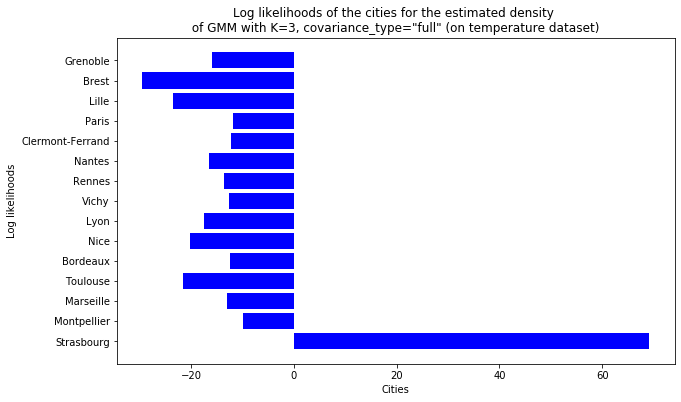

In [1152]:
log_likelihoods_temper3 = gmm_temper3.score_samples(X_temper)
sorted_indices3 = np.flip(log_likelihoods_temper3.argsort())

fig = plt.figure(figsize=(10,6))

plt.barh(villes[sorted_indices3], log_likelihoods_temper[sorted_indices3], color="blue")
plt.xlabel("Cities")
plt.ylabel("Log likelihoods")
plt.title("""Log likelihoods of the cities for the estimated density \n of GMM with K=3, covariance_type="full" (on temperature dataset) """)
plt.show()

Given the above plot, the 3 cities that are the most likely to be outliers are Brest, Lille and Toulouse since they have the lowest log-likelihoods.

Without surprise, the log-likelihood of Strasbourg (city n°12) is really high, because it is the only city in its cluster.

Finally, GMM with K=2 makes sense (it detects the southern cluster), but using K=3 should be able to highlight the western cluster as the KMeans did. Unfortunately, I didn't manage to get such a clustering despite the (normally) correct settings. 

#### MNIST DATASET

#### GMM with n_components = 3 and covariance_type="diag"

In [1058]:
gmm_mnist = GaussianMixture(n_components=3, covariance_type="diag", random_state=0).fit(x_mnist)

In [1059]:
centroids_mnist_gmm = gmm_mnist.means_
y_preds_mnist_gmm = gmm_mnist.predict(x_mnist)

print(centroids_mnist_gmm.shape)
print(y_preds_mnist_gmm[:10])

(3, 784)
[1 1 1 1 1 0 1 1 1 1]


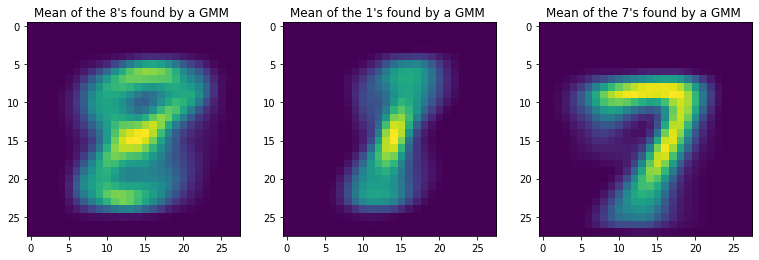

In [1060]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(13, 6)) 

for i, digit in enumerate([8,1,7]):
    ax[i].imshow(centroids_mnist_gmm[i].reshape(28,28))
    ax[i].set_title("""Mean of the {}'s found by a GMM """.format(digit))
plt.show()

Whereas the centroids of the "8"'s and the "7"'s are easily recognizable, the centroid of the "1"'s looks weird.

- The centroid of the "1"'s looks a bit like a "8", so there might be confusions between "8" and "1" images.


- Notice that the centroid of the "7"'s does not have the horizontal bar (probably because a majority of the "7"'s don't have the bar either), which makes it look a bit like a "1". As a consequence, there is expected to be many misclassification of "7" digits.

Then let's check how the images are clustered and whether our remarks are relevant or not:

#### Performance

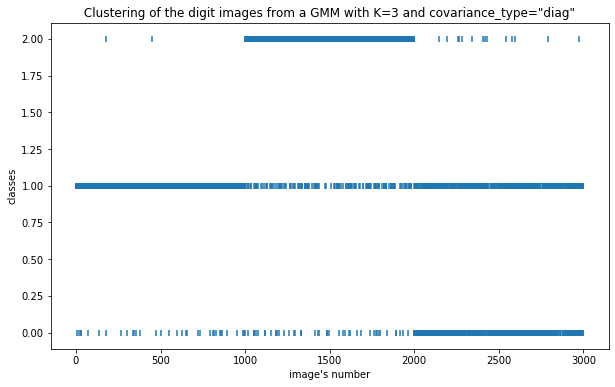

In [1061]:
fig = plt.figure(figsize=(10,6))

plt.scatter(range(3000), y_preds_mnist_gmm, marker="|")
plt.xlabel("image's number")
plt.ylabel("classes")
plt.title(""" Clustering of the digit images from a GMM with K=3 and covariance_type="diag" """)
plt.show()

As detailed for the performance plot of the KMeans, we can say that:

- the model does very few mistakes when classifying the "1"'s


- it confuses quite a lot "7" with "1" : this is the prediction we made in the vizualisation section. 


- it does even worse on the "8"'s digits: a lot of "8" are being confused with "1", which is quite suprising because "8" and "1"'s shapes are pretty different. But at the same time, the centroid of the "1" digits has a sightly "node" shape, and that could be the reason of the confusion.

In [1063]:
adjusted_rand_score(y_preds_mnist_gmm, y_mnist.reshape(3000))

0.4413229497607609

The adjusted_rand_score is currently lower than the result obtained with the (best) KMeans, which was 0.74.

Since GMM generalizes the KMeans algorithm in a way (KMeans assumes that the variance-covariance matrices are diagonal unlike GMM), one could expect GMM to perform better than the KMeans, provided that the hyperparameters are correctly chosen.
In other words, K=3 and covariance_type="diag" don't seem to be the best combinaison, so let's find out what values should be used:

#### Searching for the "best" combinaison of n_components and covariance_type in the GMM:

A priori, we know that the "good" value for n_components is 3, because there are 3 classes of digits (1,7,8) in the dataset, but let's try to recover this result using a defined criterion. 

Therefore, as we did with the KMeans algorithm (through the elbow method), let's now search for the "best" hyperparameters n_components and covariance_type to use when applying a GMM. 

There are many criteria we could look at to take this decision, for instance the AIC and BIC, or log-likelihood. We are going to use these 3:

#####  "Best" according to AIC or BIC metrics

In [873]:
# Best configuration according to AIC criterion
best_configuration_aic = {"K": 0, "covariance_type": ""}

# Best configuration according to BIC criterion
best_configuration_bic = {"K": 0, "covariance_type": ""}

best_aic, best_bic = float("inf"), float("inf")

for k in K_range:
    for covariance_type in covariance_types:
        tmp_gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=0).fit(x_mnist)
        aic = tmp_gmm.aic(x_mnist)
        bic = tmp_gmm.bic(x_mnist)
        if aic < best_aic:
            best_configuration_aic["K"], best_configuration_aic["covariance_type"] = k, covariance_type
            best_aic = aic
            
        if bic < best_bic:
            best_configuration_bic["K"], best_configuration_bic["covariance_type"] = k, covariance_type
            best_bic = bic

print("Best combinaison of hyperparameters according to AIC: ", best_configuration_aic)
print("Best combinaison of hyperparameters according to BIC: ",best_configuration_bic)

Best combinaison of hyperparameters according to AIC:  {'K': 6, 'covariance_type': 'full'}
Best combinaison of hyperparameters according to BIC:  {'K': 6, 'covariance_type': 'diag'}


These are not the expected value of K, which is 3.

Morevover, the "full" covariance_type found by AIC is surprising. Indeed, since the data is high-dimensional (each example/image is represented as a 784-sized vector), the GMM probably overfits if we don't restrict the shape of the covariance matrices.
Hence, we shouldn't rely on the combinaisons found above.


Then let's try the log-likelihood:

#### "Best" according to log-likelihood metric

In [502]:
# Best configuration according to the log likelihood of the samples 
best_configuration_score_samples = {"K": 0, "covariance_type": ""}

best_score = 0

for k in K_range:
    for covariance_type in covariance_types:
        tmp_gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=0).fit(x_mnist)
        scores = tmp_gmm.score_samples(x_mnist)
        if np.sum(scores) > best_score:
            best_configuration_score_samples["K"],best_configuration_score_samples["covariance_type"] = k, covariance_type
            best_score = np.sum(scores)

print(best_configuration_score_samples)

{'K': 6, 'covariance_type': 'full'}


Once again, the optimization results in a unrelevant combinaison of hyperparameters.

We could nevertheless use K=6 and covariance_type="full" just to convince ourselves that it is far from being the best combinaison to use:

In [544]:
gmm_mnist6 = GaussianMixture(n_components=6, covariance_type="full", random_state=0).fit(x_mnist)

In [545]:
y_preds6 = gmm_mnist6.predict(x_mnist)
rand_score6 = adjusted_rand_score(y_preds6, y_mnist.reshape(3000))

print(rand_score6)

0.48368036829165706


Indeed, it is way lower than the result we had with K=3 and covariance_type="diag".

Even if it should be forbidden to use rand_score metric to find the model (it is an unsupervised learning problem, so we are not supposed to know the true labels encoded in  y_mnist), let's do so:

##### "Best" according to rand_score metric

In [192]:
best_configuration_randscore = {"K": 0, "covariance_type": ""}

best_rand_score = 0

for k in K_range:
    for covariance_type in covariance_types:
        tmp_gmm = GaussianMixture(n_components=k, covariance_type=covariance_type, random_state=0).fit(x_mnist)
        y_preds = tmp_gmm.predict(x_mnist)
        rs = adjusted_rand_score(y_preds, y_mnist.reshape(3000))
        if rs > best_rand_score:
            best_configuration_randscore["K"], best_configuration_randscore["covariance_type"] = k, covariance_type
            best_rand_score = rs

print(best_configuration_randscore)

{'K': 3, 'covariance_type': 'spherical'}


The recommendation seems to be more reasonnable than the previous ones: 

- K=3 is the expected value we just tried to recover

- covariance_type="spherical" is relevant because we are in high dimension, so it is difficult for the model to estimate many parameters. The spherical type limits this problem since there is only one paramater to find per variance-covariance matrix. 

In [193]:
print(best_rand_score)

0.7835773781545962


Since this adjusted_rand_score is higher than the previous value we obtained (with K=3 and covariance_type="diag"), let's use the corresponding combinaison of hyperparameters.

By the way, this adjusted_rand_score is indeed higher than the 0.74 from the KMeans: as a generalization of the KMeans, GMM can perform better on the dataset (according to that metric).

#### GMM with n_components = 3 and covariance_type="spherical"

In [1064]:
gmm_mnist_best = GaussianMixture(n_components=3, covariance_type="spherical", random_state=0).fit(x_mnist)

In [1069]:
centroids_mnist_gmm_best = gmm_mnist_best.means_
y_preds_mnist_gmm_best = gmm_mnist_best.predict(x_mnist)

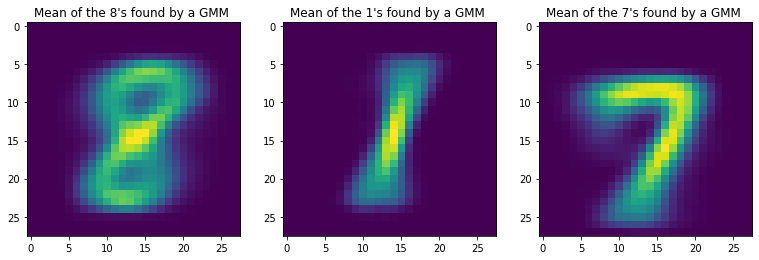

In [1072]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(13, 6)) 

for i, digit in enumerate([8,1,7]):
    ax[i].imshow(centroids_mnist_gmm_best[i].reshape(28,28))
    ax[i].set_title("""Mean of the {}'s found by a GMM """.format(digit))
plt.show()

Now, the centroid of the "1"'s is more recognizable: at least, it looks less like a "8", so that the major improvement on the clustering is that there is barely no longer confusion of the "8"'s with the "1"'s:

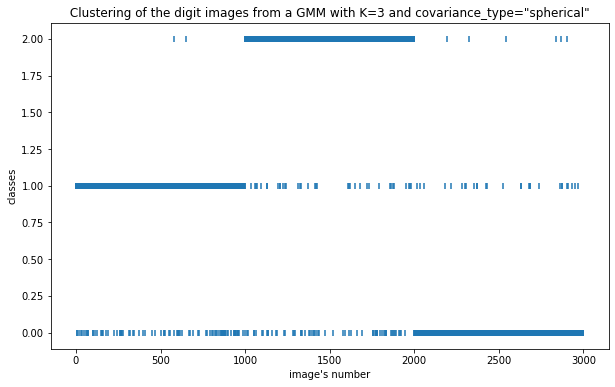

In [1071]:
fig = plt.figure(figsize=(10,6))

plt.scatter(range(3000), y_preds_mnist_gmm_best, marker="|")
plt.xlabel("image's number")
plt.ylabel("classes")
plt.title(""" Clustering of the digit images from a GMM with K=3 and covariance_type="spherical" """)
plt.show()

#### Log probability of the samples for the estimated density

In [1065]:
log_likelihood_mnist = gmm_mnist_best.score_samples(x_mnist)
print(log_likelihood_mnist)

[-4126.5903527  -4294.18529958 -4084.0145483  ... -4346.40135208
 -4553.03277748 -4386.46485396]


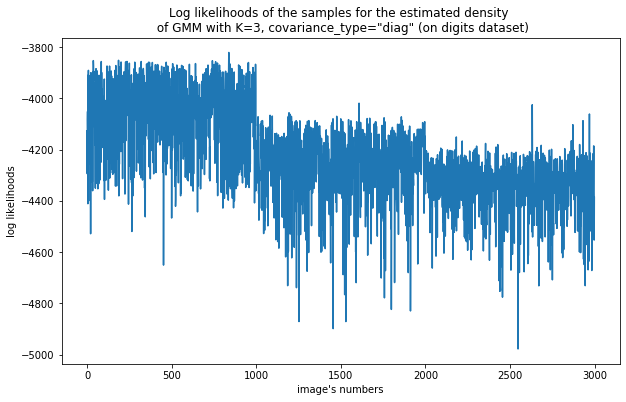

In [1066]:
fig = plt.figure(figsize=(10, 6)) 
plt.plot(log_likelihood_mnist)
plt.xlabel("image's numbers")
plt.ylabel("log likelihoods")
plt.title("""Log likelihoods of the samples for the estimated density \n of GMM with K=3, covariance_type="diag" (on digits dataset)""")
plt.show()

In [1067]:
sorted_indices = np.argsort(log_likelihood_mnist)

sorted_indices[:10]

array([2548, 1455, 1530, 1253, 1532, 1912, 1799, 1758, 2456, 1523])

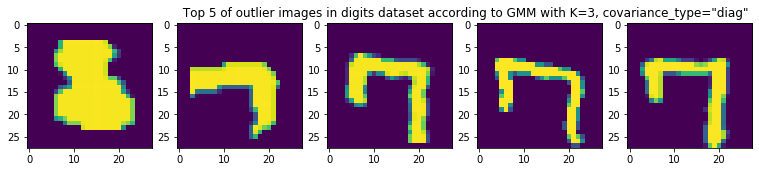

In [1068]:
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(13, 6)) 

for i,n in enumerate(sorted_indices[:5]):
    ax[i].imshow(x_mnist[n,:].reshape(28,28))
plt.title(""" Top 5 of outlier images in digits dataset according to GMM with K=3, covariance_type="diag" """, loc="right")
plt.show()

The above digits are indeed particularly badly written.

### DIMENSIONNALITY REDUCTION

#### TEMPERATURE DATASET

Before applying a PCA, let's first vizualise the correlation matrix of the temperature dataset:

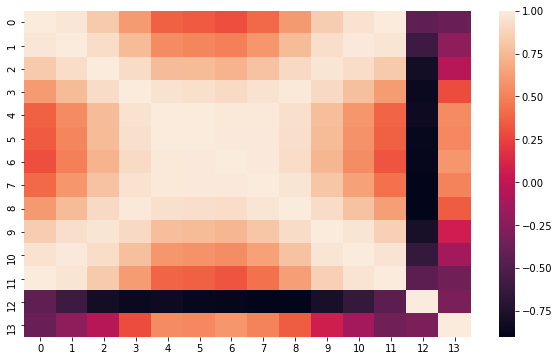

In [878]:
# data = x_temper + longitudes and latitudes
fig = plt.figure(figsize=(10, 6)) 
corr_temper = np.corrcoef(data.T)

heatmap(corr_temper)
plt.show()

The feature 12 (latitude) is (extremely) negatively correlated to the temperatures at each month. 
It was expected since the latitude indicates the north-south position on the map, and we know (general culture) the northest French cities are colder, whereas the southest ones are warmer.

The white square in the middle of the matrix corresponds to positive correlations among the summer month's temperatures: if it is hotter in May, it is also very likely that June will be hot etc

#### PCA

In [373]:
from sklearn.decomposition import PCA

pca_temper = PCA(n_components=None)

pca_temper.fit(X_temper)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [375]:
X_temper_pca = pca_temper.transform(X_temper)

print(X_temper_pca.shape)

(15, 12)


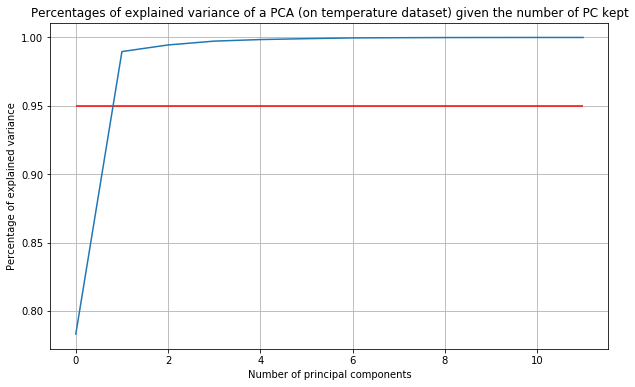

In [879]:
explained_var_temper = np.cumsum(pca_temper.explained_variance_ratio_)

fig = plt.figure(figsize=(10, 6)) 
plt.plot(explained_var_temper)
plt.hlines(y=0.95, xmin=0, xmax=11, color="red")
plt.xlabel("Number of principal components")
plt.ylabel("Percentage of explained variance")
plt.title("Percentages of explained variance of a PCA (on temperature dataset) given the number of PC kept")
plt.grid(True)
plt.show()

Keeping only the first component enables to preserve around 80\% of the total variation of the data:

In [961]:
print(explained_var_temper[0])

0.7831103050656618


whereas keeping the first 2 principal components preserves almost 99\% of the total variation of the dataset:

In [962]:
print(explained_var_temper[1])

0.9896802035903167


When keeping the 2 first components, we preserve more than 98\% of the total variation of the data.

In [948]:
pca_temper2 = PCA(n_components=2)

pca_temper2.fit(X_temper)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [949]:
X_temper_pca2 = pca_temper2.transform(X_temper)
print(X_temper_pca2.shape)

(15, 2)


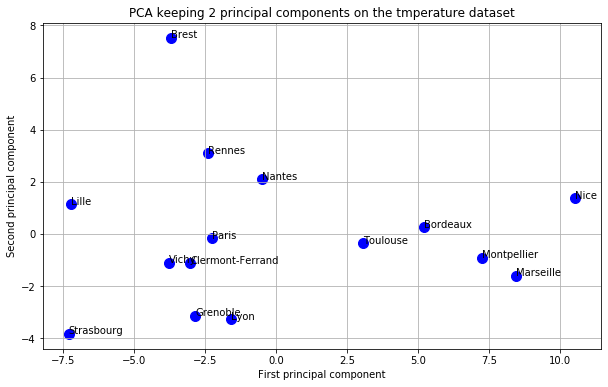

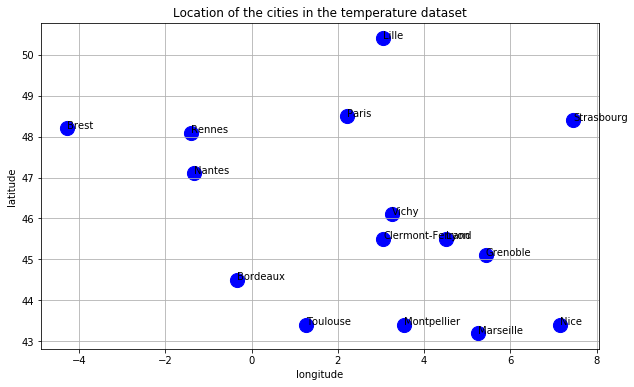

In [927]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(X_temper_pca2[:,0], X_temper_pca2[:,1], s=100, color="blue")

for i, ville in enumerate(villes):
    ax.annotate(ville,(X_temper_pca2[i,0], X_temper_pca2[i,1]))
    
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_title("PCA keeping 2 principal components on the tmperature dataset")
ax.grid(True)
plt.show()

plot_cities("Location of the cities in the temperature dataset")

Keeping 2 components from the PCA provides us with a "deformed" map which is very similar to the map we obtained while using the locations of the cities. 

They are similar in the sense that the relative distances between the cities are preserved. For instance, on the above plot, Paris is closer to Vichy than it is to Nice, which is also the case in the map using longitudes and latitudes. Similarly, Brest is closer to Rennes than it is to Marseille on both maps.

In other words, it is possible to recover the geographical similarities (north/south/west) given the temperatures of the cities along a year.

#### Analysis of the first principal component:

In [409]:
components_temper2 = pca_temper2.components_

print(components_temper2.shape)

(2, 12)


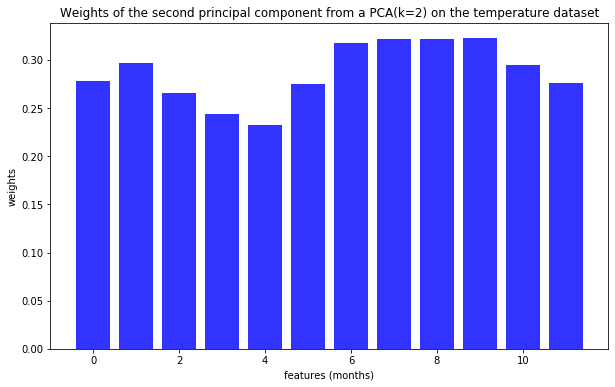

In [882]:
fig = plt.figure(figsize=(10, 6)) 
plt.bar(range(12),components_temper2[0,:], color="blue", alpha=0.8)
plt.xlabel("features (months)")
plt.ylabel("weights")
plt.title("Weights of the second principal component from a PCA(k=2) on the temperature dataset")
plt.show()

This component is a linear combinaison of the features (temperatures at each month), and the above plot shows that it focuses more on summer temperatures since the weights for the months 6 to 8 are the highest. 
Hence, this component separates the southern cities (hottest summers) from the other French cities.

To be convinced by that interpretation, let's plot the variance of the dataset along that axis only:

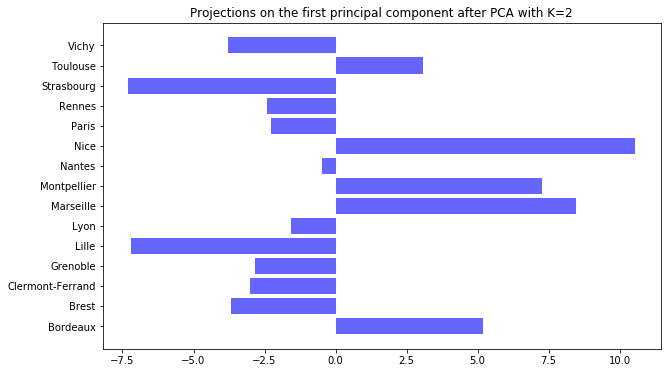

In [854]:
fig = plt.subplots(figsize=(10,6))

plt.barh(villes,X_temper_pca2[:,0], color="blue", alpha=0.6)
plt.title("Projections on the first principal component after PCA with K=2")
plt.show()

The southern cities have a positive projection, whereas the rest have a negative projection on that component. It is even more striking on the French map:

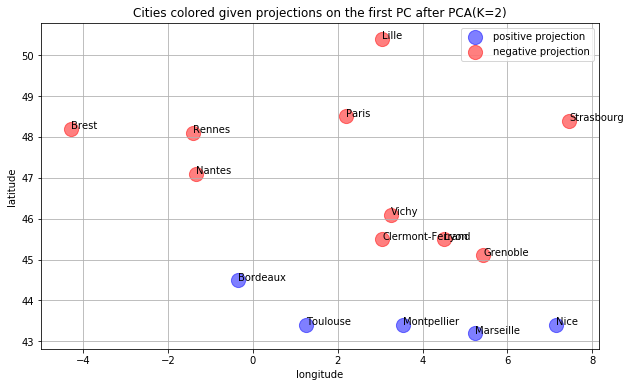

In [859]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(longitudes[X_temper_pca2[:,0] > 0],
            latitudes[X_temper_pca2[:,0] > 0],
            c="blue", cmap="tab10", vmax=9, s=200, alpha=0.5, label="positive projection")

plt.scatter(longitudes[X_temper_pca2[:,0] < 0],
            latitudes[X_temper_pca2[:,0] < 0],
            c="red", cmap="tab10", vmax=9, s=200, alpha=0.5, label="negative projection")

for i, city in enumerate(villes):
    ax.annotate(city,(longitudes[i], latitudes[i]))

ax.grid(True)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_title("Cities colored given projections on the first PC after PCA(K=2)")
plt.legend()
plt.show()

#### Analysis of the second principal component:

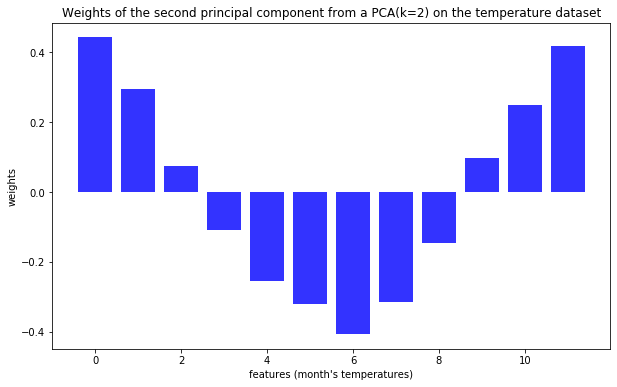

In [884]:
fig = plt.figure(figsize=(10, 6)) 
#plt.plot(range(12),components_temper2[1,:])
plt.bar(range(12),components_temper2[1,:], color="blue", alpha=0.8)
plt.xlabel("features (month's temperatures)")
plt.ylabel("weights")
plt.title("Weights of the second principal component from a PCA(k=2) on the temperature dataset")
plt.show()

The role of this second component might be to capture the western cities.

Indeed, the western cities are generally colder (lower temperatures) than in the rest of France from April (month 4) to August (month 8). As a consequence, when multiplied by the negative weights of the second principal component, the results $\left(\sum_{i=4}^{8} w_i \times t_i \right)$ should be higher for western cities (where $w_i$ is the $i^{th}$ weight of the second PC, and $t_i$ the temperature of the $i^{th}$ month in the considered city).


Assuming there isn't much difference of temperatures between western cities and elsewhere the rest of the year, the quantities $\left( \sum_{i \not\in \{4,5,6,7,8\}} w_i \times t_i \right)$ should be barely the same everywhere. Therefore, the projections $p = \sum_{i=1}^{12} w_i \times t_i = \left(\sum_{i=4}^{8} w_i \times t_i \right)  + \left( \sum_{i \not\in \{4,5,6,7,8\}} w_i \times t_i \right)$ on this PC should be higher for western cities.

Let's have a look at the projection's values:

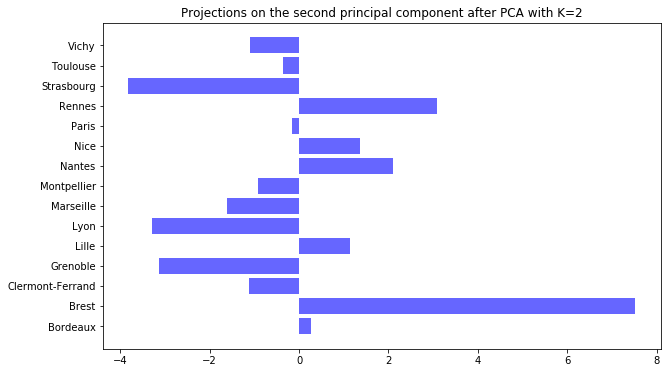

In [767]:
fig, ax = plt.subplots(figsize=(10,6))
plt.barh(villes,X_temper_pca2[:,1], color="blue", alpha=0.6)
plt.title("Projections on the second principal component after PCA with K=2")
plt.show()

As commented, the projections of the western cities (mainly Brest, Rennes and Nantes) are the highest.


$\underline{Remark}:$ Notice there are a few exceptions: for example, Nice has a relatively high projection too. This is because the temperatures in Nice are really high even the rest of the year, so that the quantity $\left( \sum_{i \not\in \{4,5,6,7,8\}} w_i \times t_i \right)$ is larger.

We can then shade the colors of the cities given their projection's values and plot them on the French map as previously:

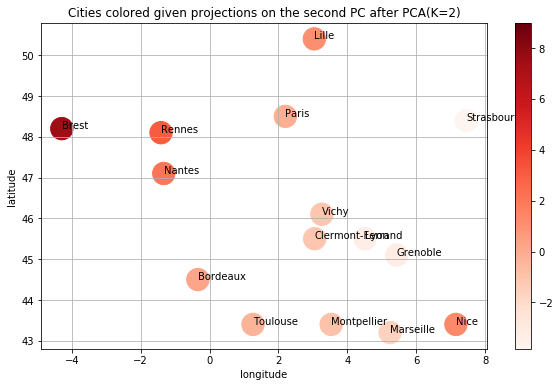

In [926]:
fig, ax = plt.subplots(figsize=(10,6))

scatter = plt.scatter(longitudes,
            latitudes,
            c=X_temper_pca2[:,1], cmap="Reds", vmax=9, s=500, alpha=1.)

for i, city in enumerate(villes):
    ax.annotate(city,(longitudes[i], latitudes[i]))

plt.colorbar()

ax.grid(True)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_title("Cities colored given projections on the second PC after PCA(K=2)")
plt.show()

####  Inverse transformation

In [950]:
X_temper_inv2 = pca_temper2.inverse_transform(X_temper_pca2)

X_temper_inv2.shape

(15, 12)

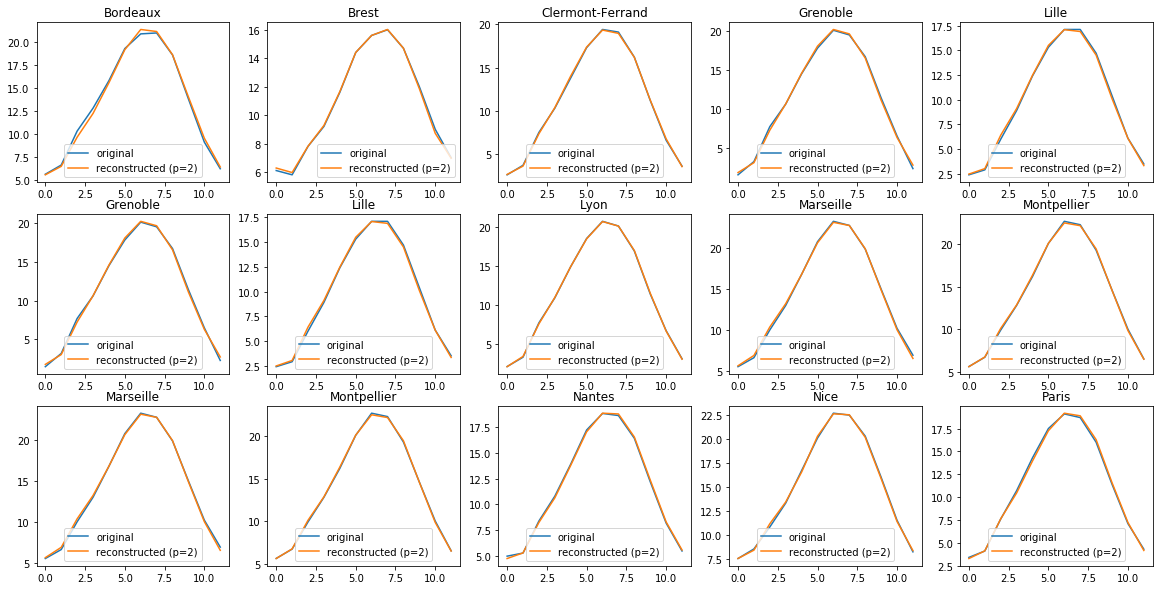

In [957]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,10))

for i in range(3):
    for j in range(5):
        ax[i,j].plot(X_temper[i*3+j], label="original")
        ax[i,j].plot(X_temper_inv2[i*3+j], label="reconstructed (p=2)")
        ax[i,j].legend()
        ax[i,j].set_title("{}".format(villes[i*3+j]))
plt.show()

In general, using the inverse transformed PCA allows to denoise the dataset, even though in our case, we almost recover the initial signals:

this is due to the fact that keeping 2 components enables to explain almost 99\% of the total variation of the dataset (see above in the notebook), which is as if we kept all the initial information and did "nothing".  

### MNIST

We won't plot the covariance matrix for the digits dataset for the number of features (28\*28) is way too large.

Then, let's immediately apply a PCA on the whole dataset by keeping all the 28*28 principal components found:

In [420]:
pca_mnist = PCA(n_components=None)

pca_mnist.fit(x_mnist)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now let's look at the how the number of components we keep can influence the quality of the projection (Percentage of explained variance of the dataset):

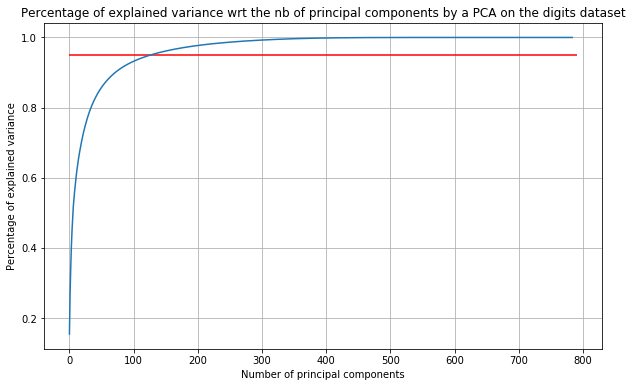

In [885]:
explained_var_mnist = np.cumsum(pca_mnist.explained_variance_ratio_)

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(explained_var_mnist)
plt.hlines(y=0.95, xmin=0, xmax=790, color="red")
plt.xlabel("Number of principal components")
plt.ylabel("Percentage of explained variance")
plt.title("Percentage of explained variance wrt the nb of principal components \
by a PCA on the digits dataset")
plt.grid(True)
plt.show()

The red horizontal line represents 95\% of explained variance in the dataset It highlights the fact that to preserve 95\% of the total variance of the samples, we should keep more than 100 principal components.  

But in order to vizualise the digits on a 2D plot, let's simply keep 2 principal components, which allow to explain:

In [963]:
# Explained variance when keeping the 2 main principal components
print(explained_var_mnist[1]*100, "%")

26.95057794431237 %


of the total variation in the dataset.

In [425]:
pca_mnist2 = PCA(n_components=2)

pca_mnist2.fit(x_mnist)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [428]:
x_mnist_pca2 = pca_mnist2.transform(x_mnist)
print(x_mnist_pca2.shape)

(3000, 2)


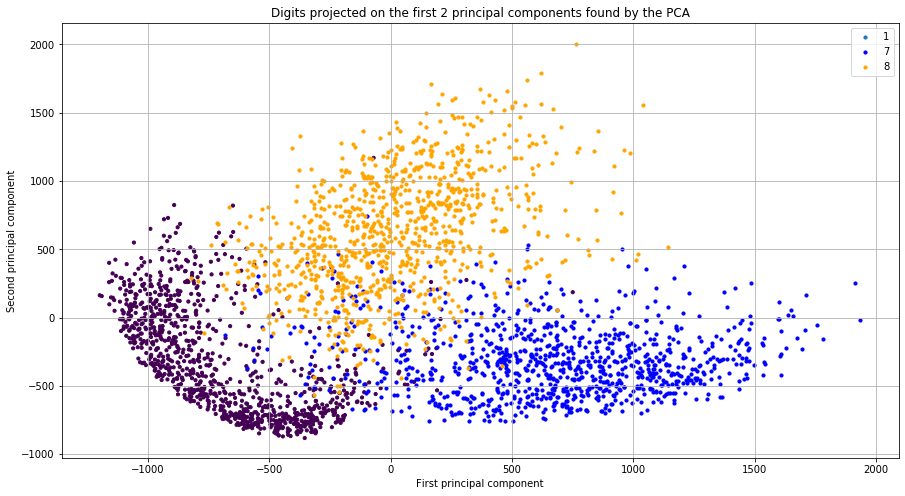

In [630]:
fig, ax = plt.subplots(figsize=(15,8))

y_mnist_ = [y[0] for y in y_mnist]
ax.scatter(x_mnist_pca2[:1000,0], x_mnist_pca2[:1000,1], s=10, c=y_mnist_[:1000], label="1")
ax.scatter(x_mnist_pca2[1000:2000,0], x_mnist_pca2[1000:2000,1], s=10, c="blue", label="7")
ax.scatter(x_mnist_pca2[2000:,0], x_mnist_pca2[2000:,1], s=10, c="orange", label="8")
    
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_title("Digits projected on the first 2 principal components found by the PCA")
ax.grid(True)
ax.legend()
plt.show()

We can see that the images are being represented as points, and coloring the points given the true labels shows that the PCA managed to separate (relatively) correctly the digits from one another.

In [438]:
components_mnist2 = pca_mnist2.components_

print(components_mnist2.shape)

(2, 784)


Let's have a look at the first principal component. As the principal components are linear combinaisons of the original features, the coefficients in front of each feature is a weight in a sense: it attributes an importance to the corresponding feature.

This is why we end up with 2 components of 784 coefficients each.

#### Analysis of the principal components

Therefore, each component can be interpreted as an image, where dark regions corresponds pixels that doesn't contribute much in the axis (small coefficients), whereas yellow regions correspond to pixels that weight more (higher coefficients associated).

Let's review them.

#### First principal component:

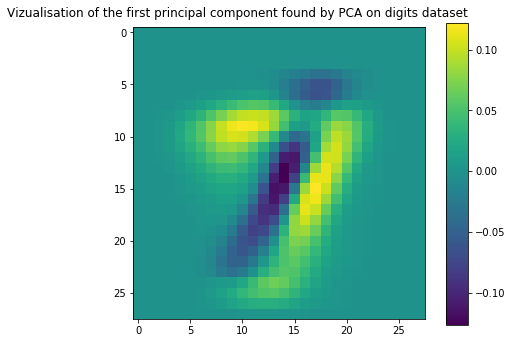

In [760]:
fig, ax = plt.subplots(figsize=(6,6))

im = ax.imshow(components_mnist2[0].reshape(28,28))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.title("Vizualisation of the first principal component found by PCA on digits dataset",
         loc="right")

plt.show()

This first principal component looks like a 1. 

To have a better idea of what this component does, let's vizualise the distributions of the coordinates (along this axis) from the different images, grouped into classes:

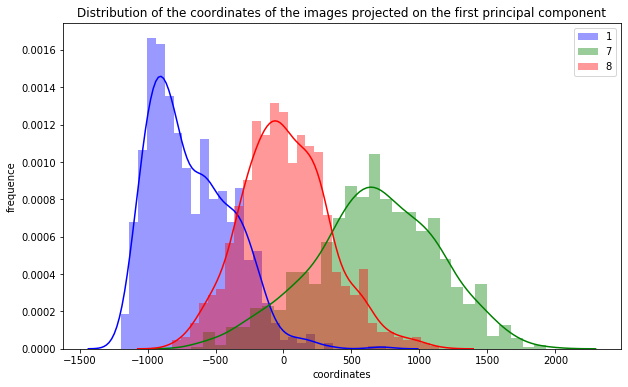

In [606]:
labels = [1,7,8]
colors = ["blue", "green", 'red']

fig, ax = plt.subplots(figsize=(10,6))

for i, label in enumerate(labels):
    sns.distplot(x_mnist_pca2[i*1000: (i+1)*1000, 0], color=colors[i], bins=30, label="{}".format(label))
plt.xlabel("coordinates")
plt.ylabel("frequence")
plt.title("Distribution of the coordinates of the images projected on the first principal component")
plt.legend()
plt.show()

The distributions are radically different for each class. Since the blue and the green distributions are far away from each other, we might deduce that the first principal component manages to separate the 1's from the 7's by looking at the yellow regions: an image containing the features is likely to be a 

#### Second principal component:

Let's vizualise the second principal component (as an image).

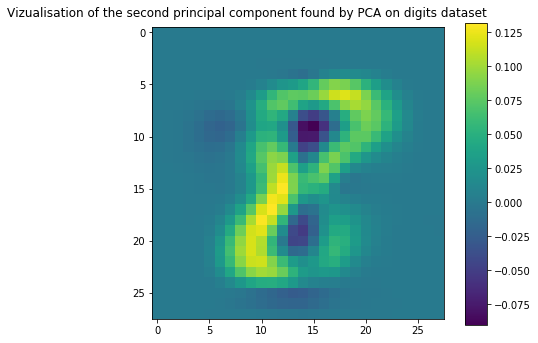

In [759]:
fig, ax = plt.subplots(figsize=(6,6))

im = ax.imshow(components_mnist2[1].reshape(28,28))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.title("Vizualisation of the second principal component found by PCA on digits dataset",
         loc="right")

plt.show()

This time, the image looks like an 8. Intuitively, it means that this axis enables to separate the 8's from the other digits. Let's show why it is the case by having a look at the distributions of the coordinates along this axis:

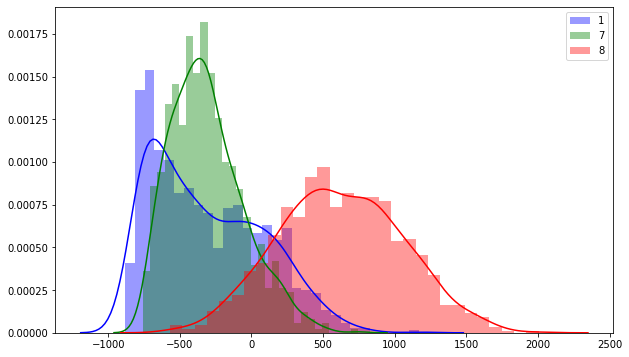

In [604]:
labels = [1,7,8]

fig, ax = plt.subplots(figsize=(10,6))

for i, label in enumerate(labels):
    sns.distplot(x_mnist_pca2[i*1000: (i+1)*1000, 1], color=colors[i], bins=30, label="{}".format(label))
plt.legend()
plt.show()

Indeed, the coordinates of the images from class 8 after the projection on that axis are positive, whereas those of the images from the other classes (1 and 7) are negative.

#### Inverse Transformation 

Let's recover images by applying an inverse transform on the points created by the PCA:

In [454]:
x_mnist_inverse2 = pca_mnist2.inverse_transform(x_mnist_pca2)

x_mnist_inverse2.shape

(3000, 784)

We can now plot a few images:

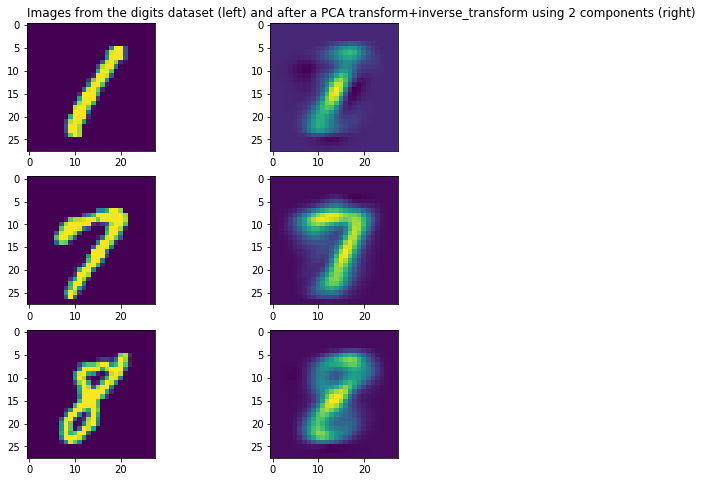

In [627]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i in range(3):
    # The index 1000*i allows to have images from every class
    axes[i,0].imshow(x_mnist[1000*i].reshape(28,28))
    axes[i,1].imshow(x_mnist_inverse2[1000*i].reshape(28,28))

axes[0,0].set_title("Images from the digits dataset (left) and after a PCA transform+inverse_transform \
using 2 components (right)", loc="left")
plt.show()

By returning to the original space ($\mathbb{R}^{28\times28}$), the images are "denoised".

Because keeping 2 components of PCA only enables to explain 27% of the total variance of the dataset (only a small fraction of the information was preserved), it appears that the recovered images are quite different from the initial ones.  

Let's reproduce the same steps (transform then inverse transform) but using different numbers of principal components. We will successively keep the following numbers of principal components:

In [482]:
p_to_test = np.linspace(2,210,5)

print(p_to_test)

[  2.  54. 106. 158. 210.]


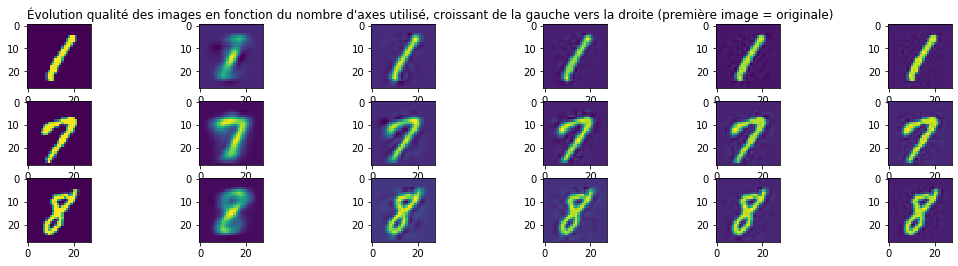

In [483]:
fig, ax = plt.subplots(nrows=3, ncols=len(p_to_test)+1, figsize=(18,4))

ax[0,0].imshow(x_mnist[0].reshape(28,28))
ax[1,0].imshow(x_mnist[1000].reshape(28,28))
ax[2,0].imshow(x_mnist[2000].reshape(28,28))

for i,p in enumerate(p_to_test):
    pca_tmp = PCA(n_components=int(p)).fit(x_mnist)
    x_mnist_inv = pca_tmp.inverse_transform(pca_tmp.transform(x_mnist))
    ax[0,i+1].imshow(x_mnist_inv[0].reshape(28,28))
    ax[1,i+1].imshow(x_mnist_inv[1000].reshape(28,28))
    ax[2,i+1].imshow(x_mnist_inv[2000].reshape(28,28))
ax[0,0].set_title("Évolution qualité des images en fonction du nombre d'axes utilisé, \
croissant de la gauche vers la droite (première image = originale)",
          loc="left")

plt.show()   

The higher the number of components, the more the noise when we apply the inverse transform, because we kept more and more information, even the unnecessary ones.

### MANIFOLD LEARNING : TSNE

#### TEMPERATURE DATASET

In [546]:
from sklearn.manifold import TSNE

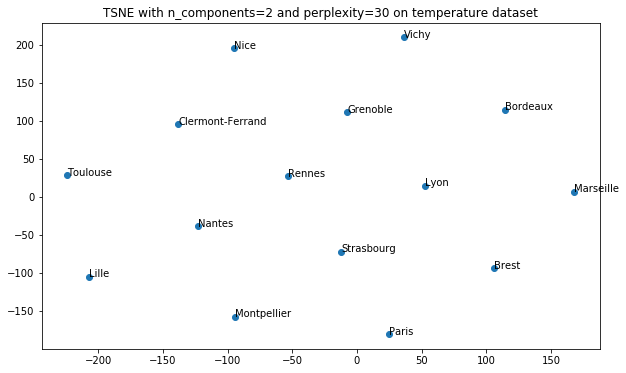

In [1103]:
def plot_tsne_temp(perplexity=30):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=0)

    X_temp_tsne = tsne.fit_transform(X_temper)
    
    fig, ax = plt.subplots(figsize=(10,6))

    ax.scatter(list(X_temp_tsne[:,0]), list(X_temp_tsne[:,1]))


    for i, ville in enumerate(villes):
        ax.annotate(ville,(float(X_temp_tsne[i,0]), float(X_temp_tsne[i,1])))

    plt.title("TSNE with n_components=2 and perplexity={} on temperature dataset".format(perplexity))
    plt.show()

plot_tsne_temp()

We cannot retrieve no information from this plot since all cities are equivalently distant from one another. Indeed, Paris is close to Lyon for instance, and Brest is close to Marseilles. there is no reason for that, the clustering is completely arbitrary here.

The default perplexity (kind of bandwith) of 30 is maybe too high, so the model certainly behaves as if we worked with an uniform distribution over the samples.

Let's modify it:

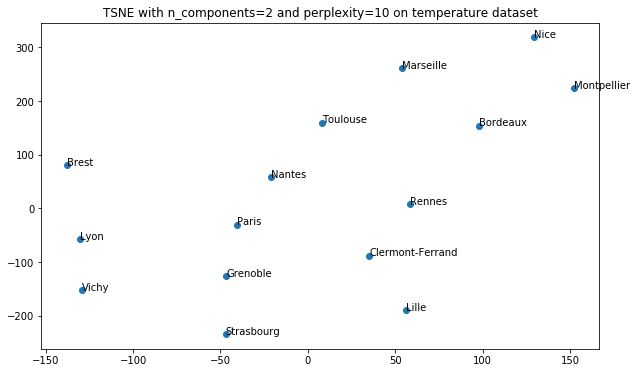

In [1104]:
plot_tsne_temp(10)

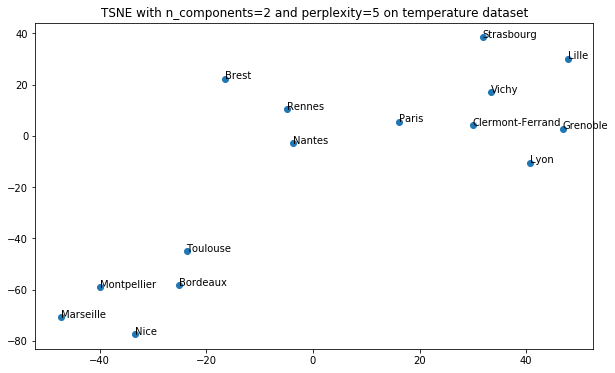

In [1105]:
plot_tsne_temp(5)

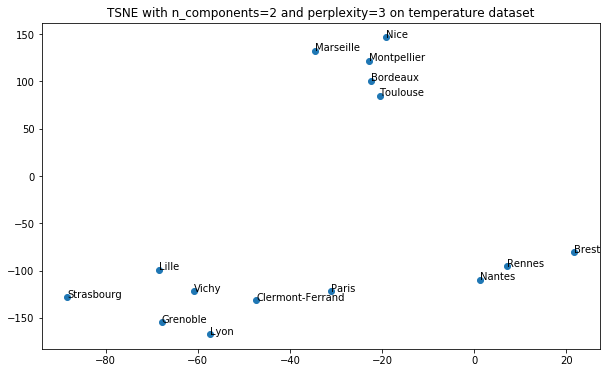

In [1106]:
plot_tsne_temp(3)

Then we have a coherent clustering of the dataset, in the sense that it clusters cities we would expect are very similar (in the sense of temperatures as well as geographically) to each other (Nice and Marseille are really close for example, as well as Paris is close to Clermont-Ferrand).

We recover a kind of distorded French map which nevertheless preserves the geographical proximities of the cities (this was expected as TSNE preserves the probability distributions)


There are 3 clusters, the ones that we already highlighted using the KMeans and the GMM previously.

#### MNIST DATASET

In [753]:
def plot_digits_tsne(X_tsne, title):
    
    labels = ["1","7","8"]
    cols = ["blue","red","orange"]
    
    fig, ax = plt.subplots(figsize=(10,6))

    for i,label in enumerate(labels):
        ax.scatter(list(X_tsne[1000*i:1000*(i+1),0]),
                   list(X_tsne[1000*i:1000*(i+1),1]),
                   s=10, c=cols[i], label=label, alpha=0.6)

    plt.title(title)
    plt.legend()
    plt.show()

In [751]:
# With perplexity=30 (by default)

tsne_mnist = TSNE(n_components=2, random_state=0)
X_temper_tsne_mnist = tsne_mnist.fit_transform(x_mnist)

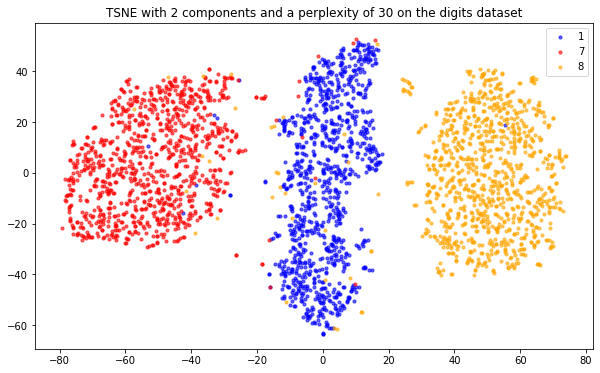

In [754]:
plot_digits_tsne(X_temper_tsne_mnist, "TSNE with 2 components and a perplexity of 30 on the digits dataset")

The TSNE is way more discriminant than the PCA: the classes are split way more clearly (the "distances" between each cluster are higher).

But as we decrease the perplexity, they come closer and closer to one another:

In [755]:
tsne5_mnist = TSNE(n_components=2, perplexity=5, random_state=0)
X_temper_tsne5_mnist = tsne5_mnist.fit_transform(x_mnist)

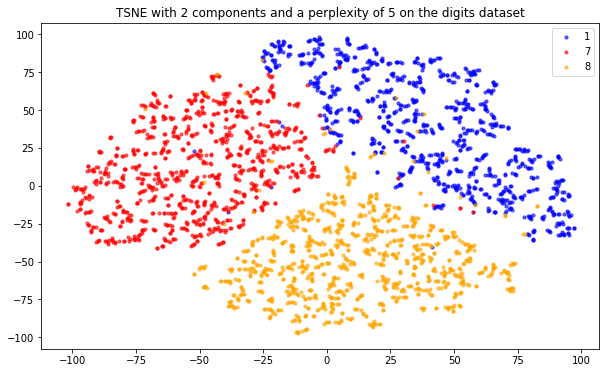

In [756]:
plot_digits_tsne(X_temper_tsne5_mnist, "TSNE with 2 components and a perplexity of 5 on the digits dataset")

In [757]:
tsne2_mnist = TSNE(n_components=2, perplexity=2, random_state=0)
X_temper_tsne2_mnist = tsne2_mnist.fit_transform(x_mnist)

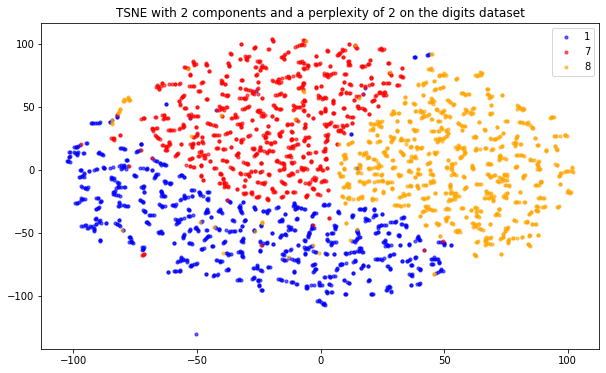

In [758]:
plot_digits_tsne(X_temper_tsne2_mnist, "TSNE with 2 components and a perplexity of 2 on the digits dataset")

If perplexity is too small either, the data is not split as clearly as before: there is no longer empty space between the clusters, which are being aggregated into a single block.